In [1]:
from torchviz import make_dot
from models.deep_cnn import DeepCNN
from models.simple_cnn import SimpleCNN
from models.cnn_with_fc import CNNWithFC
import torch
import matplotlib.pyplot as plt
import pandas as pd


# Good ones

In [15]:
from graphviz import Digraph

def draw_model_two_rows():
    dot = Digraph(format="png")
    dot.attr(dpi="300")  # High resolution
    dot.attr(rankdir="LR", size="10,6")  # Layout left to right

    # Nodes
    dot.node("Input", "Input (3x32x32)")
    dot.node("Conv1", "Conv2d (3→32, 3x3)")
    dot.node("ReLU", "ReLU")
    dot.node("Pool", "MaxPool2d (2x2)")
    dot.node("Flatten", "Flatten")
    dot.node("Dropout", "Dropout (p=0.5)")
    dot.node("FC1", "Linear (8192→10)")
    dot.node("Output", "Output (10)")

    # Edges
    dot.edge("Input", "Conv1")
    dot.edge("Conv1", "ReLU")
    dot.edge("ReLU", "Pool")
    dot.edge("Pool", "Flatten")
    dot.edge("Flatten", "Dropout")
    dot.edge("Dropout", "FC1")
    dot.edge("FC1", "Output")

    # Arrange into two rows using invisible nodes and rank grouping
    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Input")
        s.node("Conv1")
        s.node("ReLU")
        s.node("Pool")

    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Flatten")
        s.node("Dropout")
        s.node("FC1")
        s.node("Output")

    dot.render("cnn_layer_diagram_2rows", cleanup=True)
    print("Two-row diagram saved as cnn_layer_diagram_2rows.png")

draw_model_two_rows()


Two-row diagram saved as cnn_layer_diagram_2rows.png


In [16]:
from graphviz import Digraph

def draw_cnn_with_fc():
    dot = Digraph(format="png")
    dot.attr(dpi="300")
    dot.attr(rankdir="LR", size="12,6")

    # Nodes
    dot.node("Input", "Input (3x32x32)")
    dot.node("Conv1", "Conv2d (3→32, 3x3)")
    dot.node("Pool", "MaxPool2d (2x2)")
    dot.node("Flatten", "Flatten")
    dot.node("FC1", "Linear (8192→128)")
    dot.node("ReLU", "ReLU")
    dot.node("Dropout", "Dropout (p=0.5)")
    dot.node("FC2", "Linear (128→10)")
    dot.node("Output", "Output (10)")

    # Edges
    dot.edge("Input", "Conv1")
    dot.edge("Conv1", "Pool")
    dot.edge("Pool", "Flatten")
    dot.edge("Flatten", "FC1")
    dot.edge("FC1", "ReLU")
    dot.edge("ReLU", "Dropout")
    dot.edge("Dropout", "FC2")
    dot.edge("FC2", "Output")

    # Two-row layout
    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Input")
        s.node("Conv1")
        s.node("Pool")
        s.node("Flatten")

    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("FC1")
        s.node("ReLU")
        s.node("Dropout")
        s.node("FC2")
        s.node("Output")

    dot.render("cnn_with_fc_2rows", cleanup=True)
    print("Diagram saved as cnn_with_fc_2rows.png")

draw_cnn_with_fc()


Diagram saved as cnn_with_fc_2rows.png


In [17]:
from graphviz import Digraph

def draw_deep_cnn():
    dot = Digraph(format="png")
    dot.attr(dpi="300")
    dot.attr(rankdir="LR", size="14,8")

    # Layer nodes
    dot.node("Input", "Input (3x32x32)")

    # Conv Block 1
    dot.node("Conv1", "Conv2d (3→64)")
    dot.node("ReLU1", "ReLU")
    dot.node("Conv2", "Conv2d (64→128)")
    dot.node("ReLU2", "ReLU")
    dot.node("Pool1", "MaxPool2d (2x2)")

    # Conv Block 2 & 3
    dot.node("Conv3", "Conv2d (128→256)")
    dot.node("ReLU3", "ReLU")
    dot.node("Conv4", "Conv2d (256→512)")
    dot.node("ReLU4", "ReLU")
    dot.node("Pool2", "MaxPool2d (2x2)")
    dot.node("Conv5", "Conv2d (512→512)")
    dot.node("ReLU5", "ReLU")
    dot.node("Pool3", "MaxPool2d (2x2)")

    # Fully connected block
    dot.node("Flatten", "Flatten")
    dot.node("FC1", "Linear (8192→1024)")
    dot.node("ReLU6", "ReLU")
    dot.node("Dropout1", "Dropout (p=0.3)")
    dot.node("FC2", "Linear (1024→512)")
    dot.node("ReLU7", "ReLU")
    dot.node("Dropout2", "Dropout (p=0.4)")
    dot.node("FC3", "Linear (512→10)")
    dot.node("Output", "Output (10)")

    # Edges
    dot.edge("Input", "Conv1")
    dot.edge("Conv1", "ReLU1")
    dot.edge("ReLU1", "Conv2")
    dot.edge("Conv2", "ReLU2")
    dot.edge("ReLU2", "Pool1")

    dot.edge("Pool1", "Conv3")
    dot.edge("Conv3", "ReLU3")
    dot.edge("ReLU3", "Conv4")
    dot.edge("Conv4", "ReLU4")
    dot.edge("ReLU4", "Pool2")
    dot.edge("Pool2", "Conv5")
    dot.edge("Conv5", "ReLU5")
    dot.edge("ReLU5", "Pool3")

    dot.edge("Pool3", "Flatten")
    dot.edge("Flatten", "FC1")
    dot.edge("FC1", "ReLU6")
    dot.edge("ReLU6", "Dropout1")
    dot.edge("Dropout1", "FC2")
    dot.edge("FC2", "ReLU7")
    dot.edge("ReLU7", "Dropout2")
    dot.edge("Dropout2", "FC3")
    dot.edge("FC3", "Output")

    # Layout with three horizontal levels
    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Input")
        s.node("Conv1")
        s.node("ReLU1")
        s.node("Conv2")
        s.node("ReLU2")
        s.node("Pool1")

    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Conv3")
        s.node("ReLU3")
        s.node("Conv4")
        s.node("ReLU4")
        s.node("Pool2")
        s.node("Conv5")
        s.node("ReLU5")
        s.node("Pool3")

    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Flatten")
        s.node("FC1")
        s.node("ReLU6")
        s.node("Dropout1")
        s.node("FC2")
        s.node("ReLU7")
        s.node("Dropout2")
        s.node("FC3")
        s.node("Output")

    dot.render("deep_cnn_architecture", cleanup=True)
    print("Diagram saved as deep_cnn_architecture.png")

draw_deep_cnn()


Diagram saved as deep_cnn_architecture.png


In [18]:
from graphviz import Digraph

def draw_mlpmixer():
    dot = Digraph(format="png")
    dot.attr(dpi="300")
    dot.attr(rankdir="LR", size="14,7")

    # Main nodes
    dot.node("Input", "Input (3x32x32)")
    dot.node("Patchify", "Patchify (4x4 patches)")
    dot.node("Embedding", "Linear Patch Embedding")
    dot.node("MixerBlocks", "MixerBlock ×6")
    dot.node("AvgPool", "Global Average Pool (mean)")
    dot.node("FC", "Linear (256→10)")
    dot.node("Output", "Output (10)")

    # MixerBlock substructure
    dot.node("TokenNorm", "LayerNorm", shape="box")
    dot.node("TokenMLP", "Token Mixer (MLP)", shape="box")
    dot.node("ChannelNorm", "LayerNorm", shape="box")
    dot.node("ChannelMLP", "Channel Mixer (MLP)", shape="box")

    # Connections
    dot.edge("Input", "Patchify")
    dot.edge("Patchify", "Embedding")
    dot.edge("Embedding", "MixerBlocks")
    dot.edge("MixerBlocks", "AvgPool")
    dot.edge("AvgPool", "FC")
    dot.edge("FC", "Output")

    # Internal MixerBlock connections
    dot.edge("MixerBlocks", "TokenNorm")
    dot.edge("TokenNorm", "TokenMLP")
    dot.edge("TokenMLP", "ChannelNorm")
    dot.edge("ChannelNorm", "ChannelMLP")
    dot.edge("ChannelMLP", "MixerBlocks", label="Residual", style="dashed")

    dot.render("mlp_mixer_architecture", cleanup=True)
    print("Diagram saved as mlp_mixer_architecture.png")

draw_mlpmixer()


Diagram saved as mlp_mixer_architecture.png


In [19]:
from graphviz import Digraph

def draw_mlpmixer_vertical():
    dot = Digraph(format="png")
    dot.attr(dpi="300")
    dot.attr(rankdir="TB", size="6,12")  # Vertical layout

    # Main pipeline nodes
    dot.node("Input", "Input (3x32x32)")
    dot.node("Patchify", "Patchify (4x4 patches)")
    dot.node("Embedding", "Linear Patch Embedding")
    dot.node("MixerBlocks", "MixerBlock ×6")
    dot.node("AvgPool", "Global Average Pool (mean)")
    dot.node("FC", "Linear (256→10)")
    dot.node("Output", "Output (10)")

    # Internal MixerBlock layers (single block view)
    dot.node("TokenNorm", "LayerNorm", shape="box")
    dot.node("TokenMLP", "Token Mixer (MLP)", shape="box")
    dot.node("ChannelNorm", "LayerNorm", shape="box")
    dot.node("ChannelMLP", "Channel Mixer (MLP)", shape="box")

    # Connections (vertical flow)
    dot.edge("Input", "Patchify")
    dot.edge("Patchify", "Embedding")
    dot.edge("Embedding", "MixerBlocks")
    dot.edge("MixerBlocks", "AvgPool")
    dot.edge("AvgPool", "FC")
    dot.edge("FC", "Output")

    # MixerBlock internals
    dot.edge("MixerBlocks", "TokenNorm")
    dot.edge("TokenNorm", "TokenMLP")
    dot.edge("TokenMLP", "ChannelNorm")
    dot.edge("ChannelNorm", "ChannelMLP")
    dot.edge("ChannelMLP", "MixerBlocks", label="Residual", style="dashed")

    # Render diagram
    dot.render("mlp_mixer_architecture_vertical", cleanup=True)
    print("Diagram saved as mlp_mixer_architecture_vertical.png")

draw_mlpmixer_vertical()


Diagram saved as mlp_mixer_architecture_vertical.png


# Training plots

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_accuracy(csv_path):
    # Load the CSV
    df = pd.read_csv(csv_path)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df['Epoch'], df['Loss'], label='Loss', marker='o', color = 'blue')
    plt.plot(df['Epoch'], df['Accuracy'], label='Accuracy', marker='s', color = 'magenta')

    # Formatting
    plt.title('Loss and Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


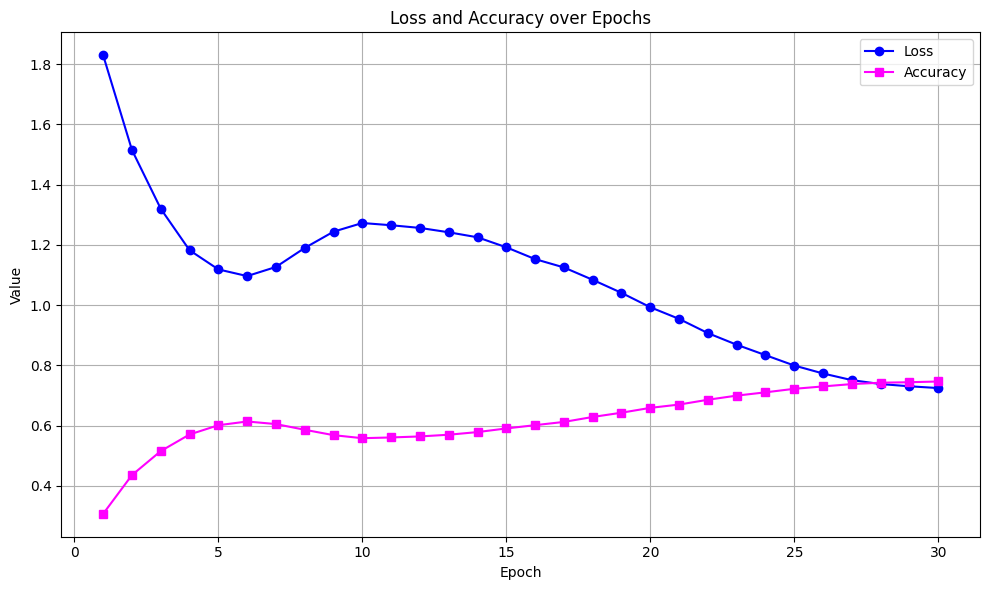

In [28]:
plot_loss_accuracy('experiments\\DeepCNN_30_rotation_translation_128_0.0_0.001_0.003_one_cycle_0.3.csv')

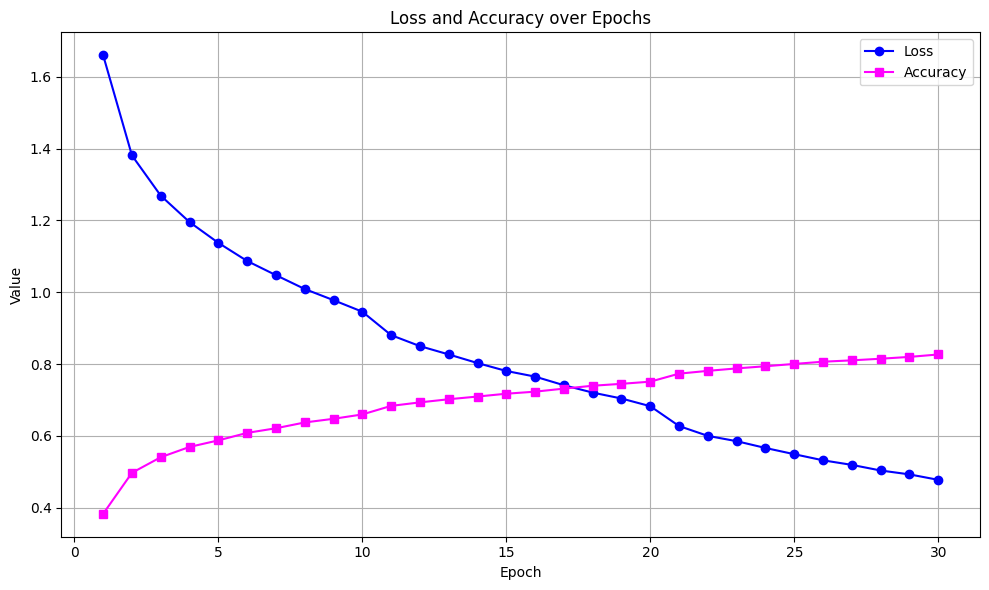

In [29]:
plot_loss_accuracy('experiments\\MLPMixer_30_rotation_translation_128_0.0_0.001_0.003_step_decay_0.3.csv')

# Proper plots

In [2]:
def plot_loss_accuracy_for_models(csv_paths, model_names, subtitle=""):
    colors = ['blue', 'magenta', 'green', 'orange']
    markers = ['o', 's', '^', 'D']
    dataframes = [pd.read_csv(path) for path in csv_paths]

    # Plot Loss
    plt.figure(figsize=(10, 5))
    plt.suptitle('Loss over Epochs', fontsize=14, fontweight='bold')
    plt.title(subtitle, fontsize=10)
    for i, df in enumerate(dataframes):
        plt.plot(df['Epoch'], df['Loss'], label=model_names[i], color=colors[i], marker=markers[i])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(10, 5))
    plt.suptitle('Accuracy over Epochs', fontsize=14, fontweight='bold')
    plt.title(subtitle, fontsize=10)
    for i, df in enumerate(dataframes):
        plt.plot(df['Epoch'], df['Accuracy'], label=model_names[i], color=colors[i], marker=markers[i])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [3]:
import os
import glob
import re
import pandas as pd
from collections import defaultdict

def auto_plot_all_experiments(directory):
    # Match files like ModelName_experiment_details.csv
    pattern = re.compile(r"(?P<model>[^_]+)_(?P<exp>.+)\.csv")

    # Group files by experiment tag
    grouped_files = defaultdict(list)

    # Find all CSVs in directory
    for filepath in glob.glob(os.path.join(directory, "*.csv")):
        filename = os.path.basename(filepath)
        match = pattern.match(filename)
        if match:
            model = match.group("model")
            exp = match.group("exp")
            grouped_files[exp].append((model, filepath))

    # For each group (experiment), create plots
    for exp, model_file_pairs in grouped_files.items():
        if len(model_file_pairs) < 2:
            continue  # Skip if not enough models to compare

        # Sort by model name for consistent coloring
        model_file_pairs.sort(key=lambda x: x[0])

        model_names = [m for m, _ in model_file_pairs]
        csv_paths = [f for _, f in model_file_pairs]

        # Call your plot function
        subtitle = exp.replace("_", " ")  # Clean subtitle formatting
        plot_loss_accuracy_for_models(csv_paths, model_names, subtitle=subtitle)


In [4]:
csv_files = [
    'experiments\\SimpleCNN_30_rotation_translation_128_0.0_0.001_0.003_one_cycle.csv',
    'experiments\\CNNWithFC_30_rotation_translation_128_0.0_0.001_0.003_one_cycle.csv',
    'experiments\\DeepCNN_30_rotation_translation_128_0.0_0.001_0.003_one_cycle.csv',
    'experiments\\MLPMixer_30_rotation_translation_128_0.0_0.001_0.003_one_cycle.csv'
]

model_labels = [
    # 'Simple CNN',
    # 'CNN with FC',
    # 'Deep CNN',
    # 'MLP-Mixer'
    'ProtoNet'
]

# plot_loss_accuracy_for_models(
#     csv_files,
#     model_labels,
#     subtitle="Experiment x: one cycle learning rate schedule"
# )

In [9]:
def format_subtitle(exp_str):
    parts = exp_str.split("_")

    num_epochs = parts[0]

    batch_index = next((i for i, p in enumerate(parts) if p.isdigit() and i > 0), None)
    if batch_index is None or len(parts) < batch_index + 5:
        return exp_str

    augmentations = "_".join(parts[1:batch_index]) if batch_index > 1 else parts[1]
    batch_size = parts[batch_index]
    l2 = parts[batch_index + 1]
    min_lr = parts[batch_index + 2]
    max_lr = parts[batch_index + 3]

    remaining = parts[batch_index + 4:]
    if len(remaining) >= 2 and remaining[1].replace('.', '', 1).isdigit() == False:
        scheduler = f"{remaining[0]}_{remaining[1]}"
        dropout = remaining[2] if len(remaining) > 2 else "?"
    else:
        scheduler = remaining[0]
        dropout = remaining[1] if len(remaining) > 1 else "?"

    # Learning rate string
    if scheduler == "one_cycle":
        lr_str = f"lr = {min_lr}, max_lr = {max_lr}"
    else:
        lr_str = f"lr = {min_lr}"

    subtitle = (
        f"epochs = {num_epochs}, "
        f"augmentations = {augmentations}, "
        f"batch size = {batch_size}, "
        f"l2 = {l2}, "
        f"{lr_str}, "
        f"scheduler = {scheduler}, "
        f"dropout = 0.3"#{dropout}"
    )

    return subtitle


def auto_plot_all_experiments(directory):
    pattern = re.compile(r"(?P<model>[^_]+)_(?P<exp>.+)\.csv")
    grouped_files = defaultdict(list)

    for filepath in glob.glob(os.path.join(directory, "*.csv")):
        filename = os.path.basename(filepath)
        match = pattern.match(filename)
        if match:
            model = match.group("model")
            exp = match.group("exp")
            grouped_files[exp].append((model, filepath))

    for exp, model_file_pairs in grouped_files.items():
        # if len(model_file_pairs) < 2:
        #     continue

        model_file_pairs.sort(key=lambda x: x[0])
        model_names = [m for m, _ in model_file_pairs]
        csv_paths = [f for _, f in model_file_pairs]

        subtitle = format_subtitle(exp)
        plot_loss_accuracy_for_models(csv_paths, model_names, subtitle=subtitle)


In [7]:
def plot_loss_accuracy_for_models(csv_paths, model_names, subtitle=""):
    colors = ['blue', 'magenta', 'green', 'orange']
    markers = ['o', 's', '^', 'D']
    dataframes = [pd.read_csv(path) for path in csv_paths]

    # Create subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    title_fontsize = 16
    label_fontsize = 14
    tick_fontsize = 12
    legend_fontsize = 12
    subtitle_fontsize = 13

    # Plot Loss
    axes[0].set_title('Loss over Epochs', fontsize=title_fontsize)
    for i, df in enumerate(dataframes):
        axes[0].plot(df['Epoch'], df['Loss'], label=model_names[i], color=colors[i], marker=markers[i])
    axes[0].set_xlabel('Epoch', fontsize=label_fontsize)
    axes[0].set_ylabel('Loss', fontsize=label_fontsize)
    axes[0].tick_params(axis='both', labelsize=tick_fontsize)
    axes[0].legend(fontsize=legend_fontsize)
    axes[0].grid(True)

    # Plot Accuracy
    axes[1].set_title('Accuracy over Epochs', fontsize=title_fontsize)
    for i, df in enumerate(dataframes):
        axes[1].plot(df['Epoch'], df['Accuracy'], label=model_names[i], color=colors[i], marker=markers[i])
    axes[1].set_xlabel('Epoch', fontsize=label_fontsize)
    axes[1].set_ylabel('Accuracy', fontsize=label_fontsize)
    axes[1].tick_params(axis='both', labelsize=tick_fontsize)
    axes[1].legend(fontsize=legend_fontsize)
    axes[1].grid(True)

    # Adjust layout and place subtitle below
    plt.tight_layout(rect=[0, 0.08, 1, 1])  # Leave space at bottom
    fig.text(0.5, 0.01, subtitle, ha='center', fontsize=subtitle_fontsize)

    plt.show()

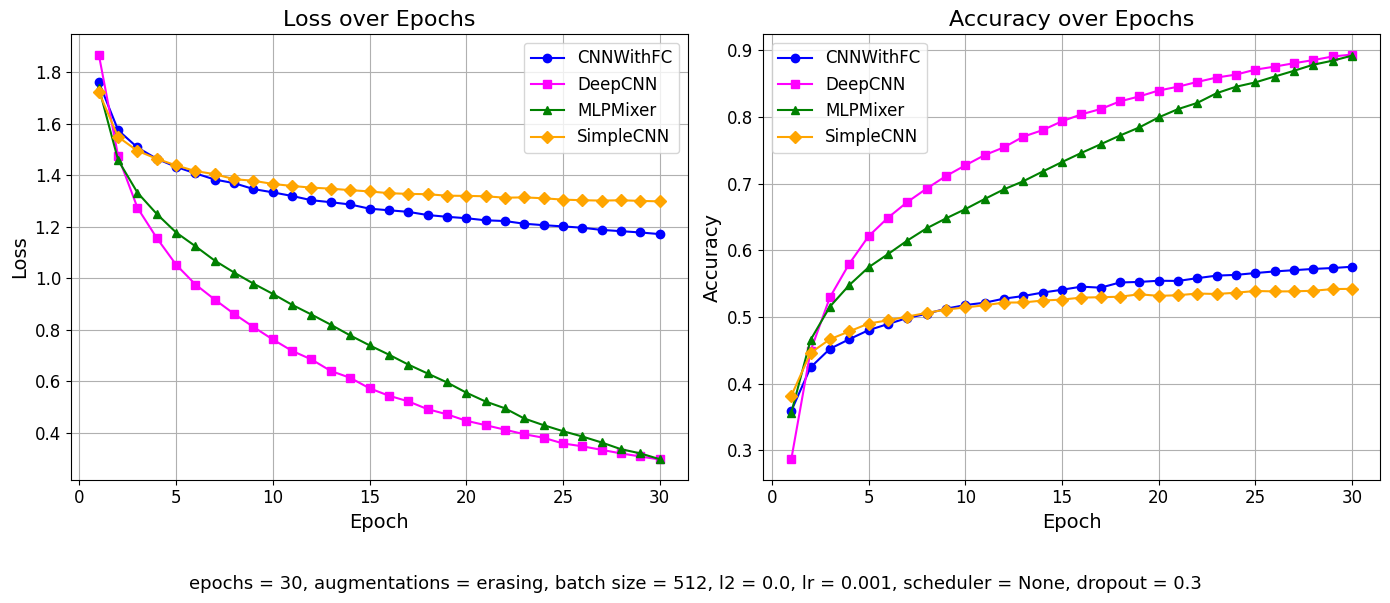

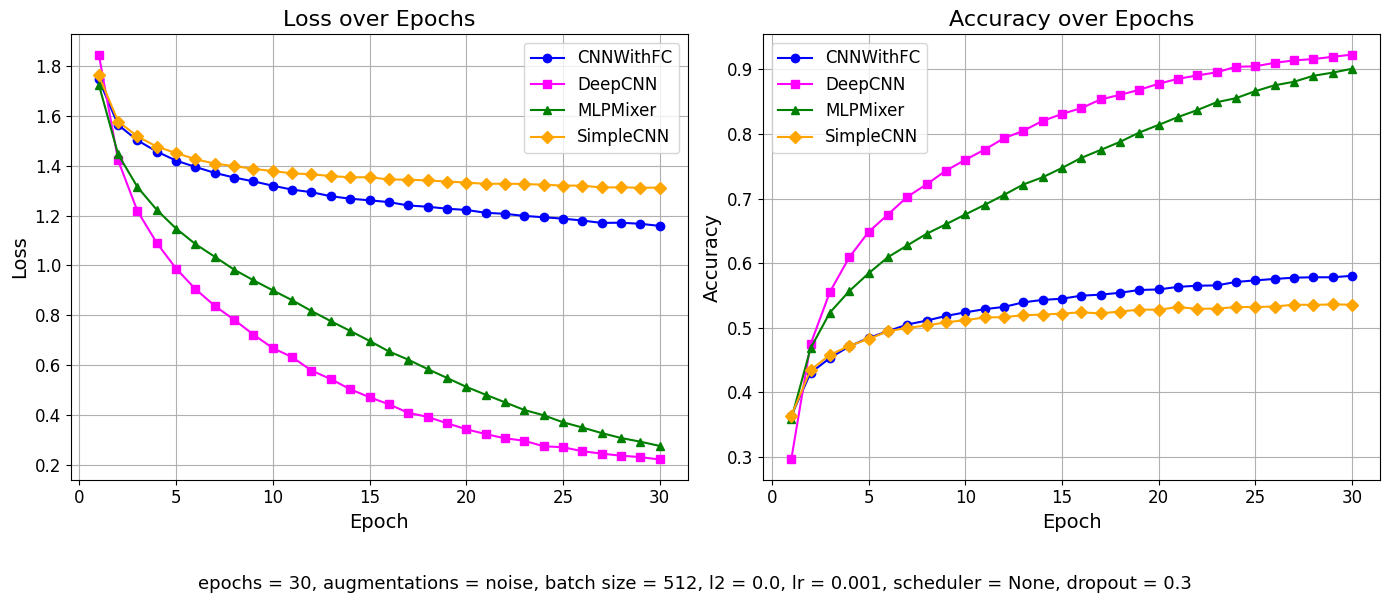

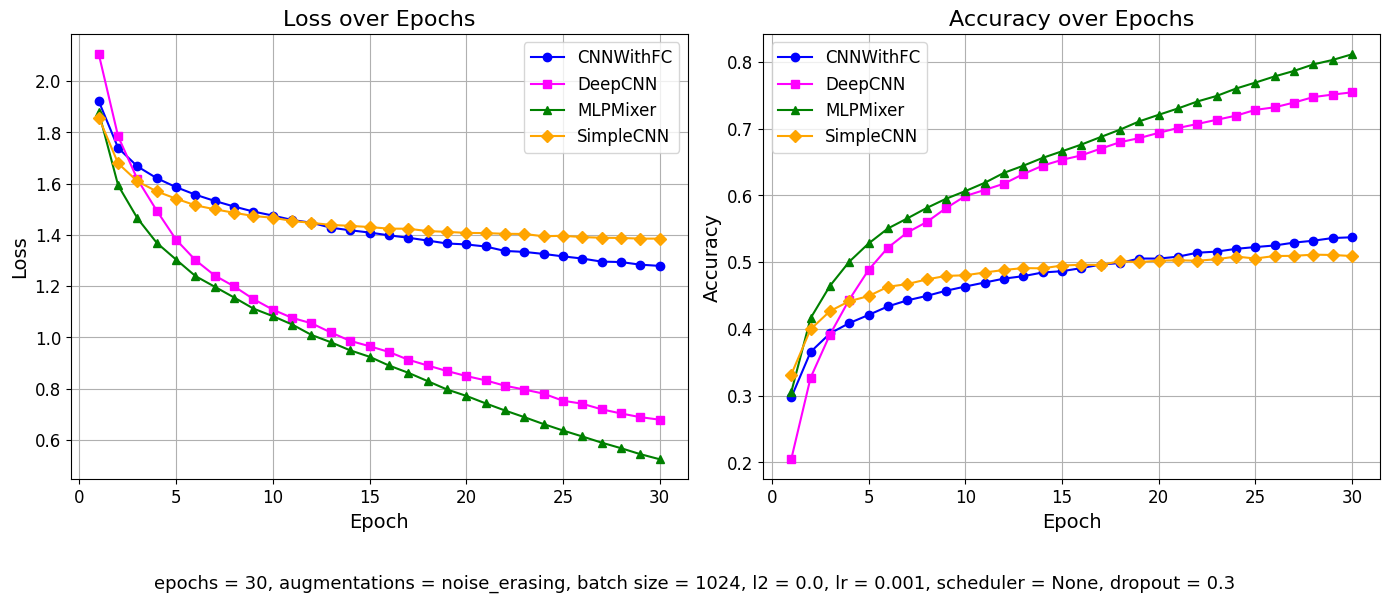

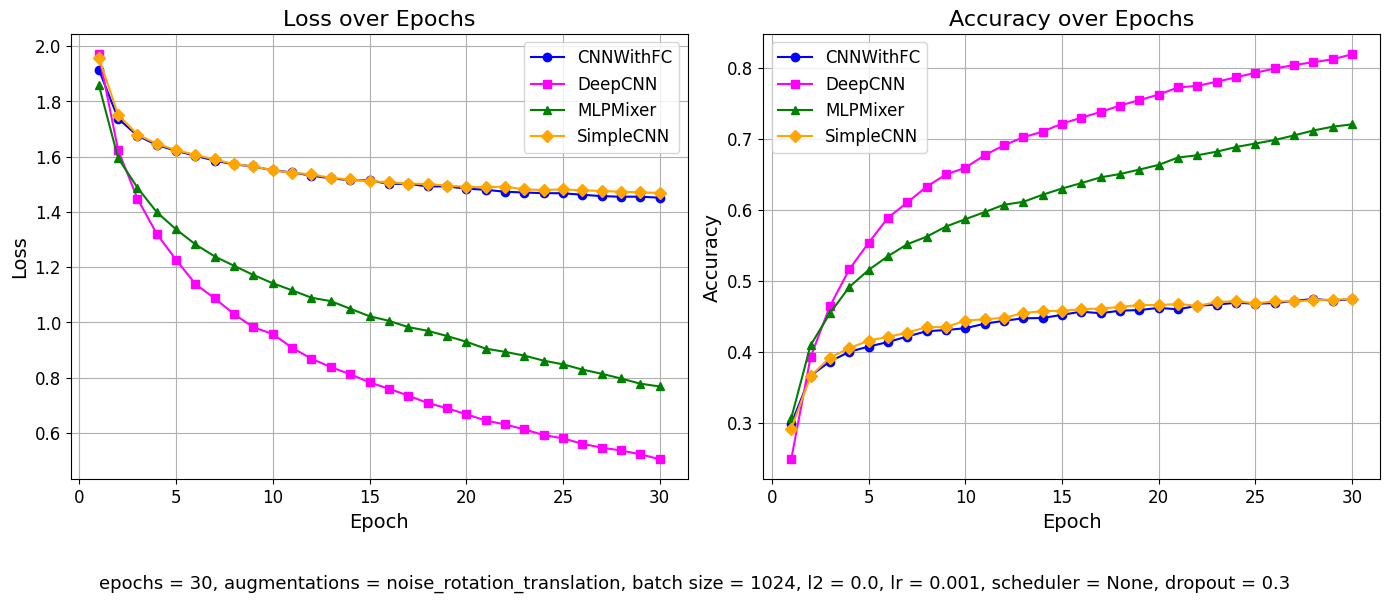

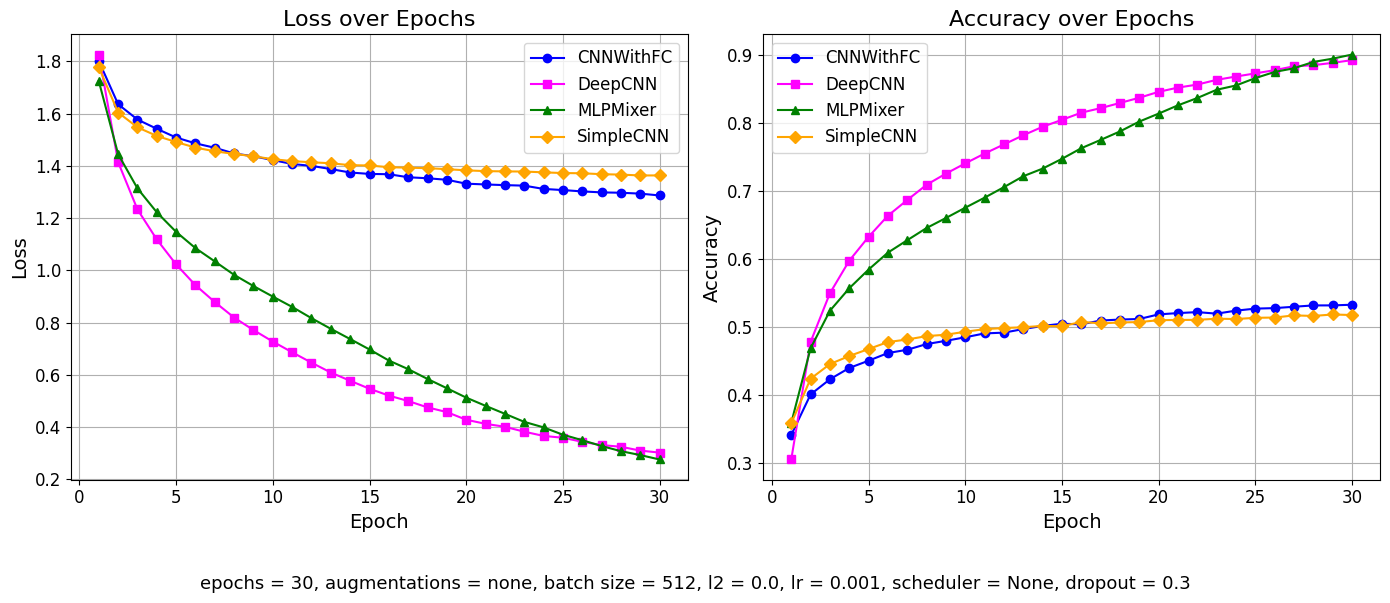

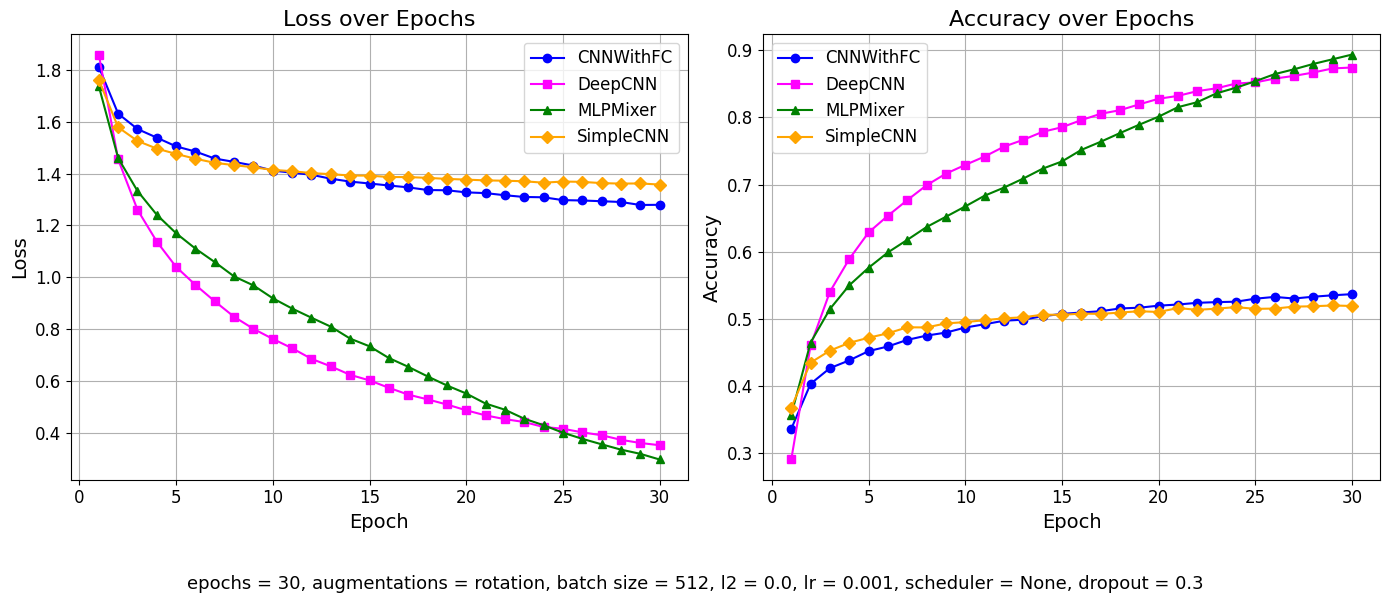

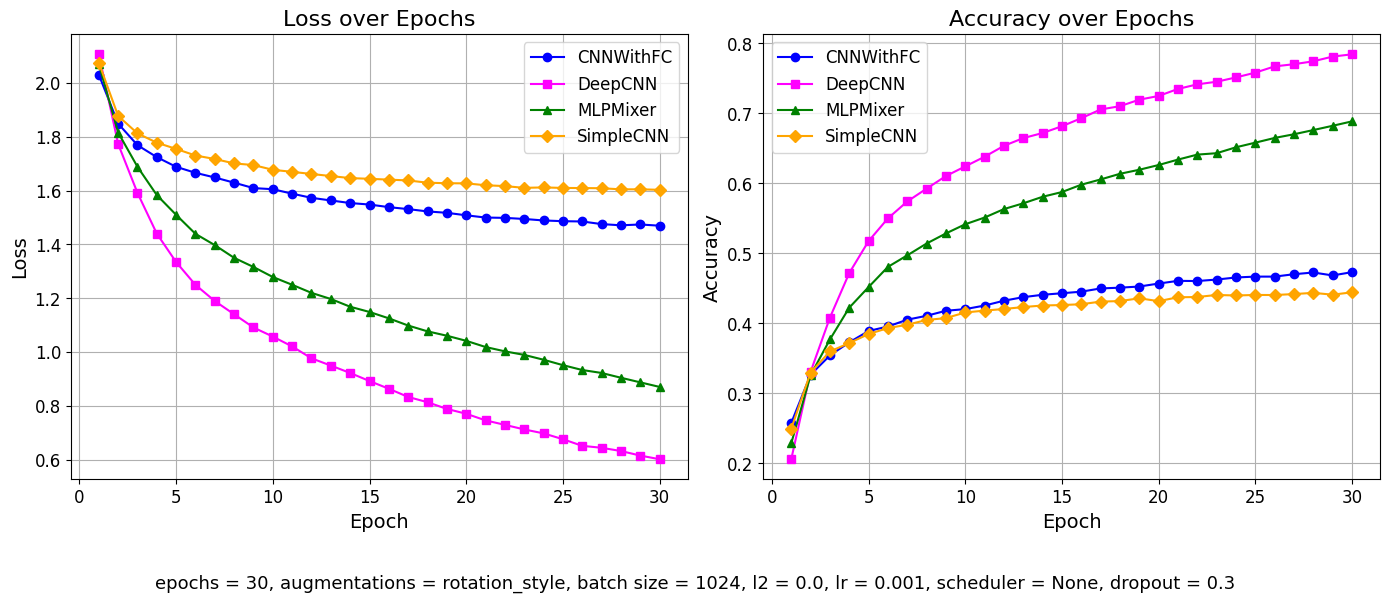

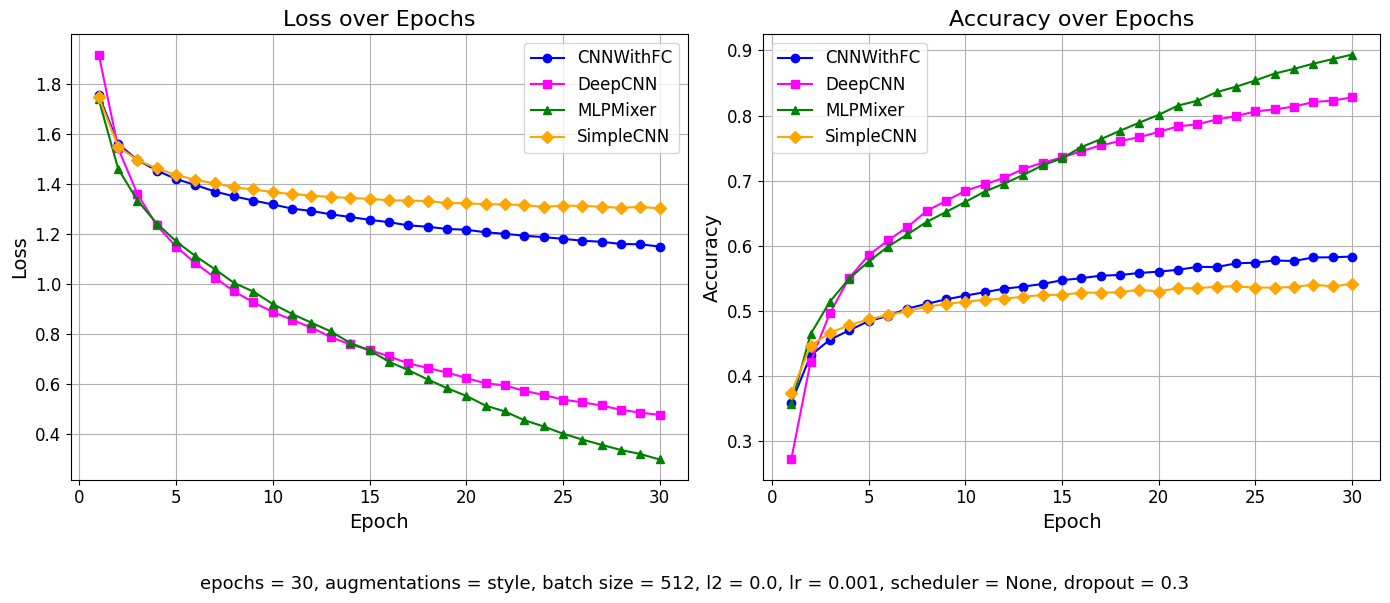

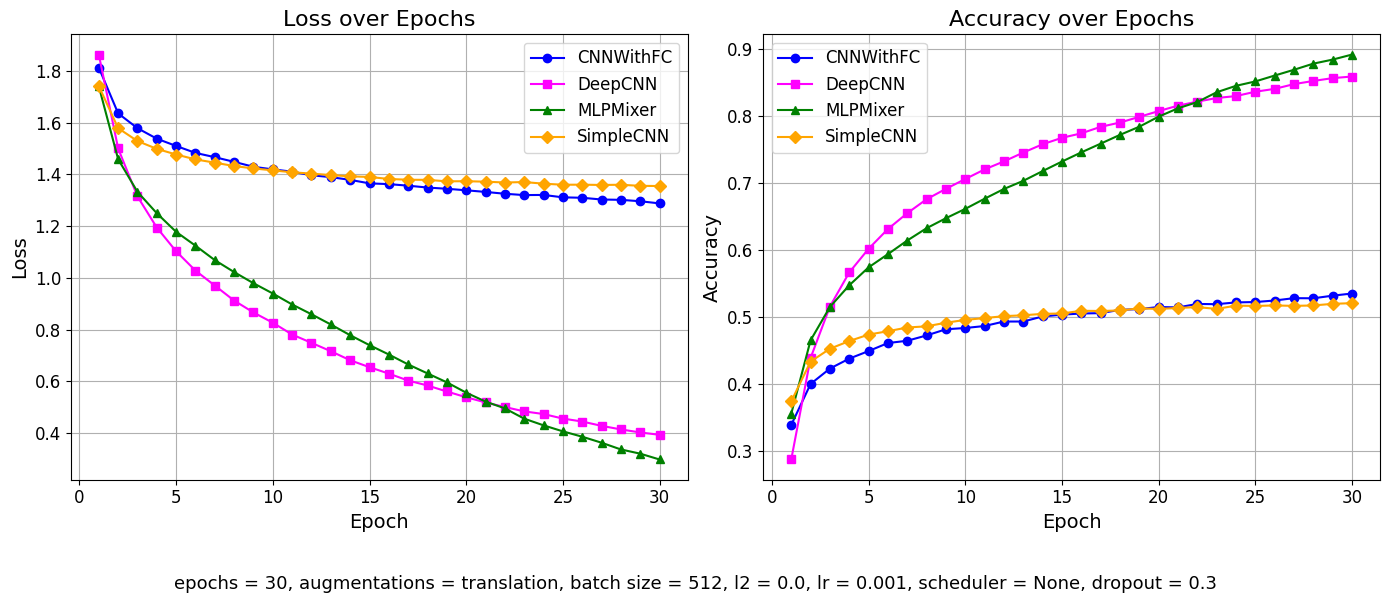

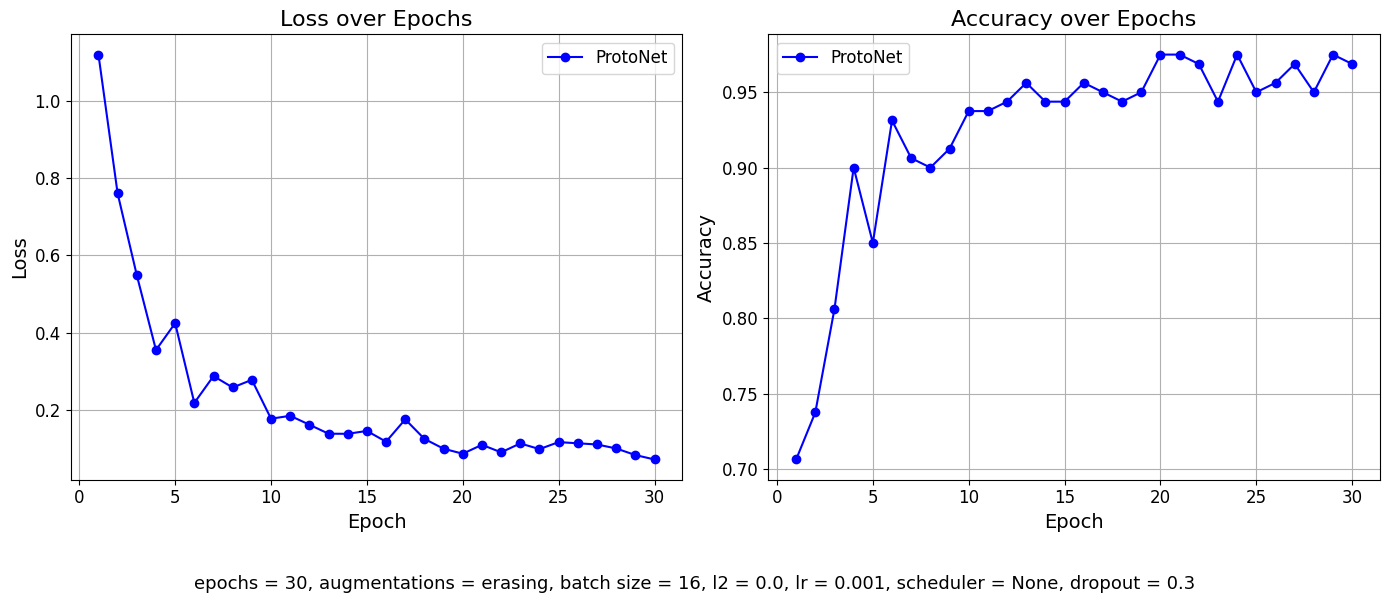

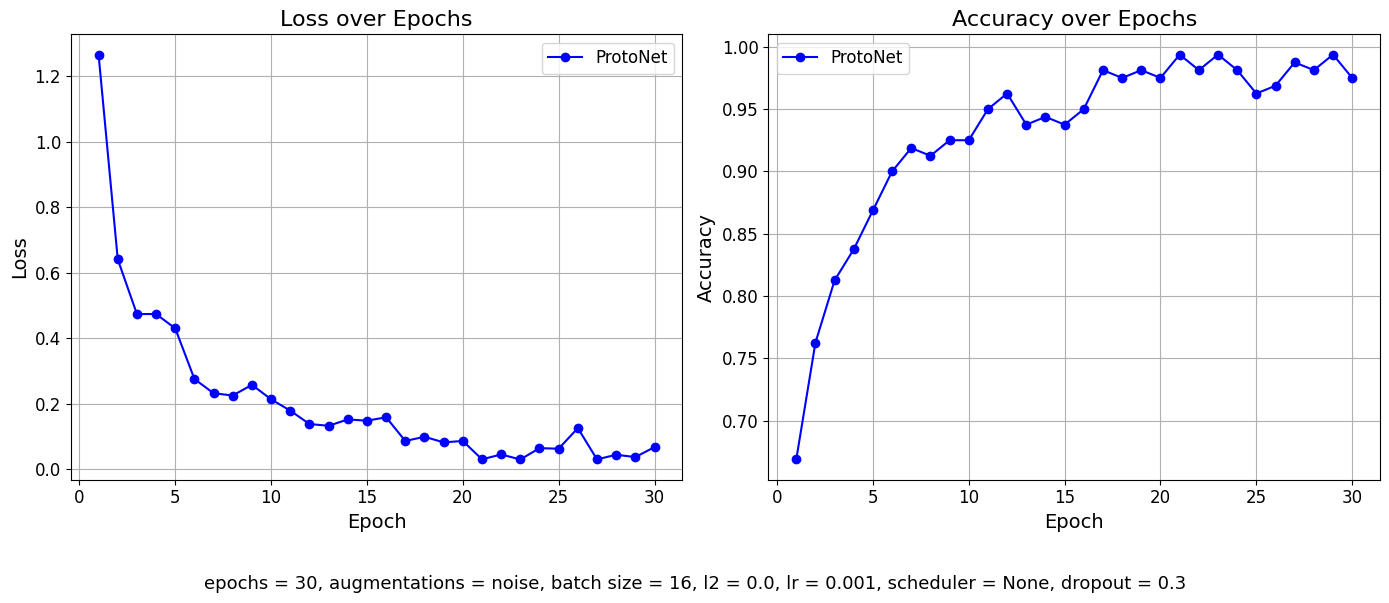

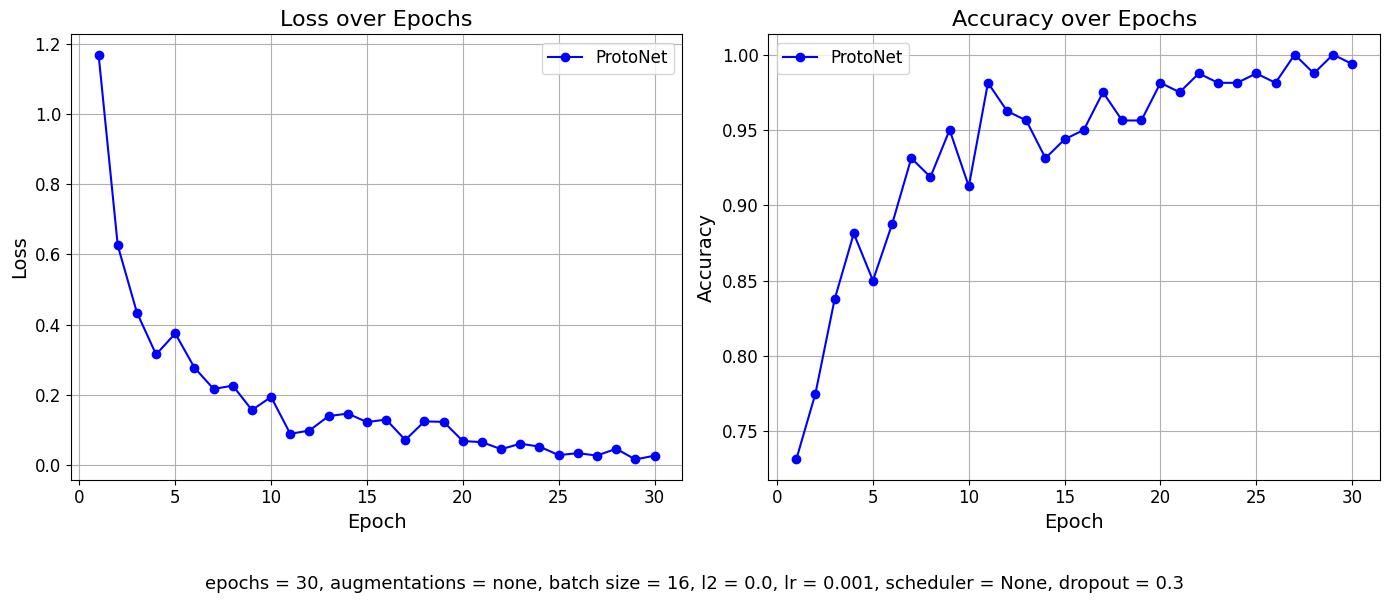

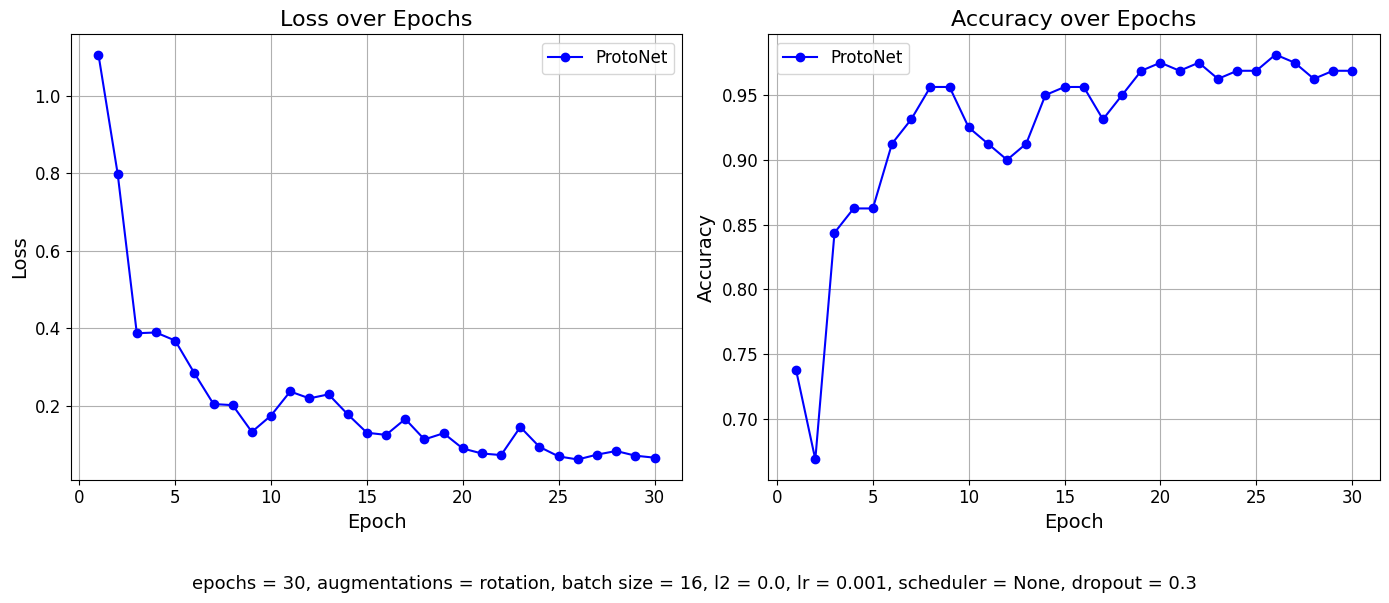

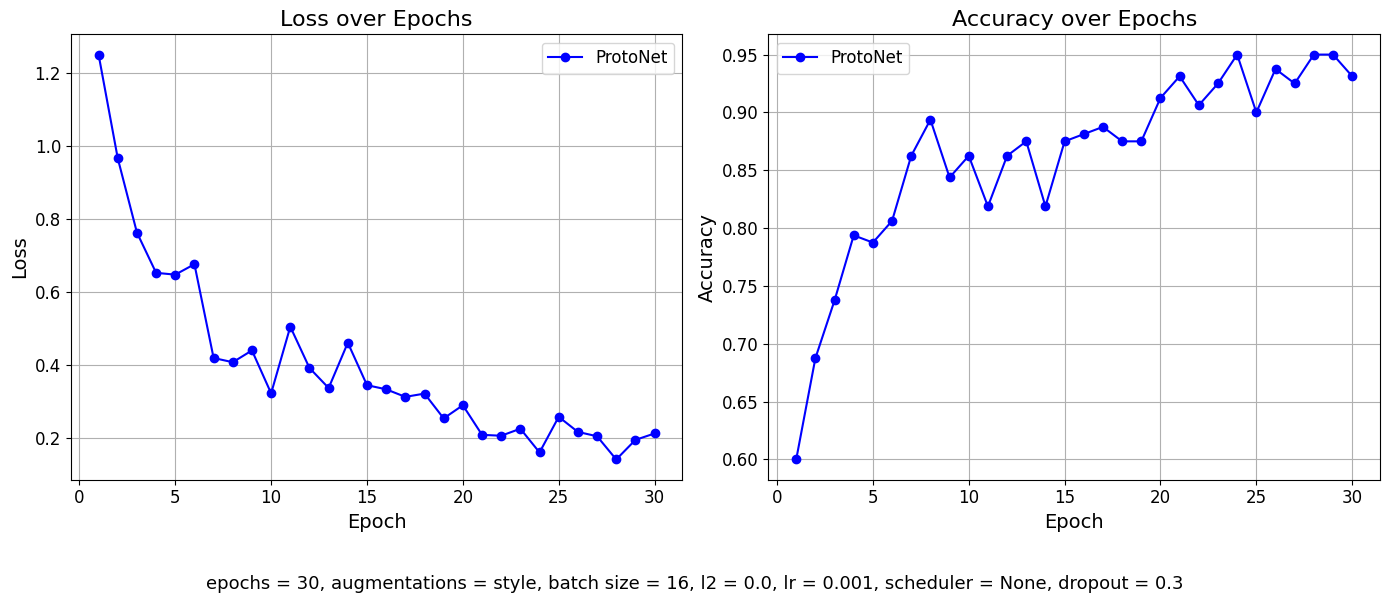

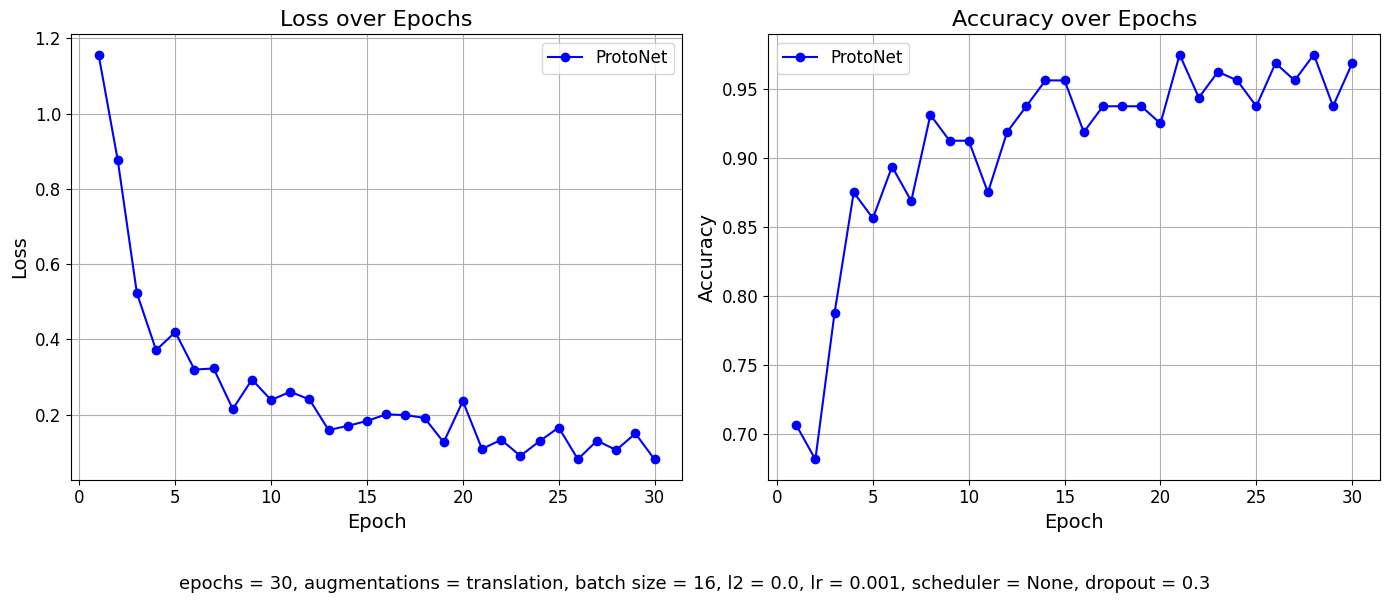

In [10]:
auto_plot_all_experiments("experiments")


In [13]:
def format_named_caption(exp_str):
    parts = exp_str.split("_")
    num_epochs = parts[0]
    batch_index = next((i for i, p in enumerate(parts) if p.isdigit() and i > 0), None)

    if batch_index is None or len(parts) < batch_index + 6:
        return exp_str

    augmentations = "_".join(parts[1:batch_index]) if batch_index > 1 else parts[1]
    batch_size = parts[batch_index]
    l2 = parts[batch_index + 1]
    min_lr = parts[batch_index + 2]
    max_lr = parts[batch_index + 3]

    # Detect scheduler and dropout
    remaining = parts[batch_index + 4:]
    if len(remaining) >= 2 and not remaining[1].replace('.', '', 1).isdigit():
        scheduler = f"{remaining[0]}_{remaining[1]}"
        dropout = remaining[2] if len(remaining) > 2 else "?"
    else:
        scheduler = remaining[0]
        dropout = remaining[1] if len(remaining) > 1 else "?"

    # Format learning rate info
    if scheduler == "one_cycle":
        lr_str = f"lr = {min_lr}, max_lr = {max_lr}"
    else:
        lr_str = f"lr = {min_lr}"

    caption = (
        f"epochs = {num_epochs}, "
        f"augmentations = {augmentations}, "
        f"batch size = {batch_size}, "
        f"l2 = {l2}, "
        f"{lr_str}, "
        f"scheduler = {scheduler}, "
        f"dropout = {dropout}"
    )

    return caption

def generate_latex_tables_from_results(txt_path):
    with open(txt_path, 'r') as f:
        lines = f.readlines()

    results = defaultdict(list)
    pattern = re.compile(r"(?P<model>[^_]+)_(?P<exp>.+): \{[^}]*'accuracy': (?P<acc>[\d\.]+)")

    for line in lines:
        match = pattern.search(line)
        if match:
            model = match.group("model")
            exp = match.group("exp")
            acc = float(match.group("acc"))
            results[exp].append((model, acc))

    # Generate LaTeX
    latex_output = ""
    for exp, model_acc_list in results.items():
        caption = format_named_caption(exp)
        latex_output += "\\begin{table}[H]\n"
        latex_output += "\\centering\n"
        latex_output += "\\begin{tabular}{|l|c|}\n"
        latex_output += "\\hline\n"
        latex_output += "Model & Test Accuracy \\\\\n"
        latex_output += "\\hline\n"
        for model, acc in sorted(model_acc_list):
            latex_output += f"{model} & {acc:.4f} \\\\\n"
        latex_output += "\\hline\n"
        latex_output += "\\end{tabular}\n"
        latex_output += f"\\caption{{Test accuracy for experiment: {caption}}}\n"
        latex_output += "\\end{table}\n\n"

    return latex_output

In [14]:
latex_code = generate_latex_tables_from_results("experiments\\test_results.txt")

In [15]:
with open("test_tables_output.txt", "w") as f:
    f.write(latex_code)